Sales prediction involves forecasting the amount of a product that customers will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

In this project my goal is to train a machine learning model for predicting future sales which analyze and interpret data, allowing them to make informed decisions regarding advertising costs. 

By leveraging these predictions, businesses can optimize their advertising strategies and maximize sales potential.

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [2]:
df4 = pd.read_csv(r"C:\Users\dhara\Downloads\advertising.csv")

# Explore the data

In [3]:
df4.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df4.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [5]:
df4.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df4.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Data Visualization and Analysis

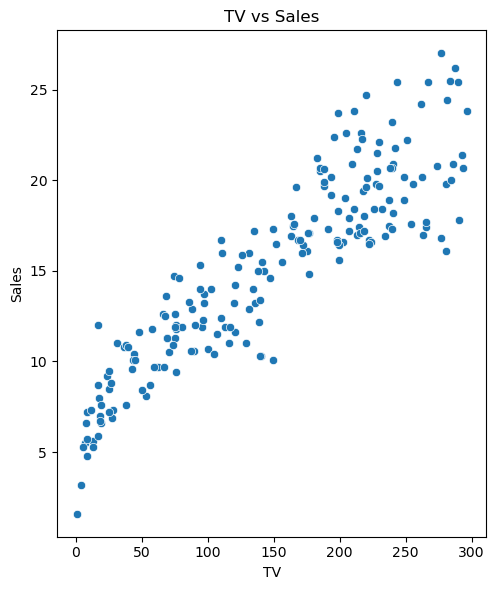

In [9]:
# Scatter plot for TV vs Sales
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
sns.scatterplot(x='TV', y='Sales', data=df4)
plt.title('TV vs Sales')
plt.tight_layout()
plt.show()

Here the scatter plot shows a strong positive trend, indicating that increases in TV advertising expenditure are strongly associated with increases in sales.

Which means investments in TV ads are likely to yield higher sales.

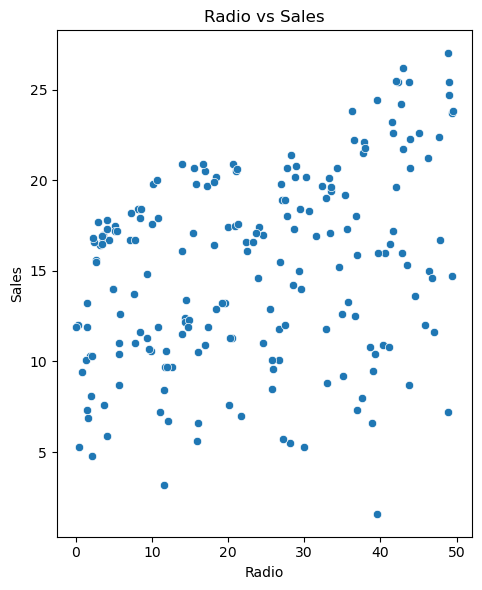

In [10]:
# Scatter plot for Radio vs Sales
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 2)
sns.scatterplot(x='Radio', y='Sales', data=df4)
plt.title('Radio vs Sales')
plt.tight_layout()
plt.show()

This scatter plot shows a moderate upward trend, indicating that increases in Radio advertising expenditure are somewhat associated with increases in sales.

Compared to TV advertising, Radio advertising is a less strong predictor of sales but still shows a positive influence.

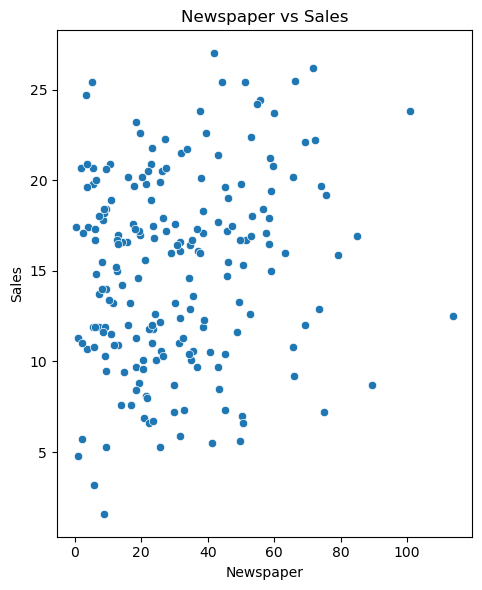

In [11]:
# Scatter plot for Newspaper vs Sales
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 3)
sns.scatterplot(x='Newspaper', y='Sales', data=df4)
plt.title('Newspaper vs Sales')
plt.tight_layout()
plt.show()

This scatter plot shows a very weak upward trend, indicating that increases in Newspaper advertising expenditure have little to no association with increases in sales.

Newspaper advertising is a poor predictor of sales in this dataset, suggesting that other factors have a stronger influence on sales.

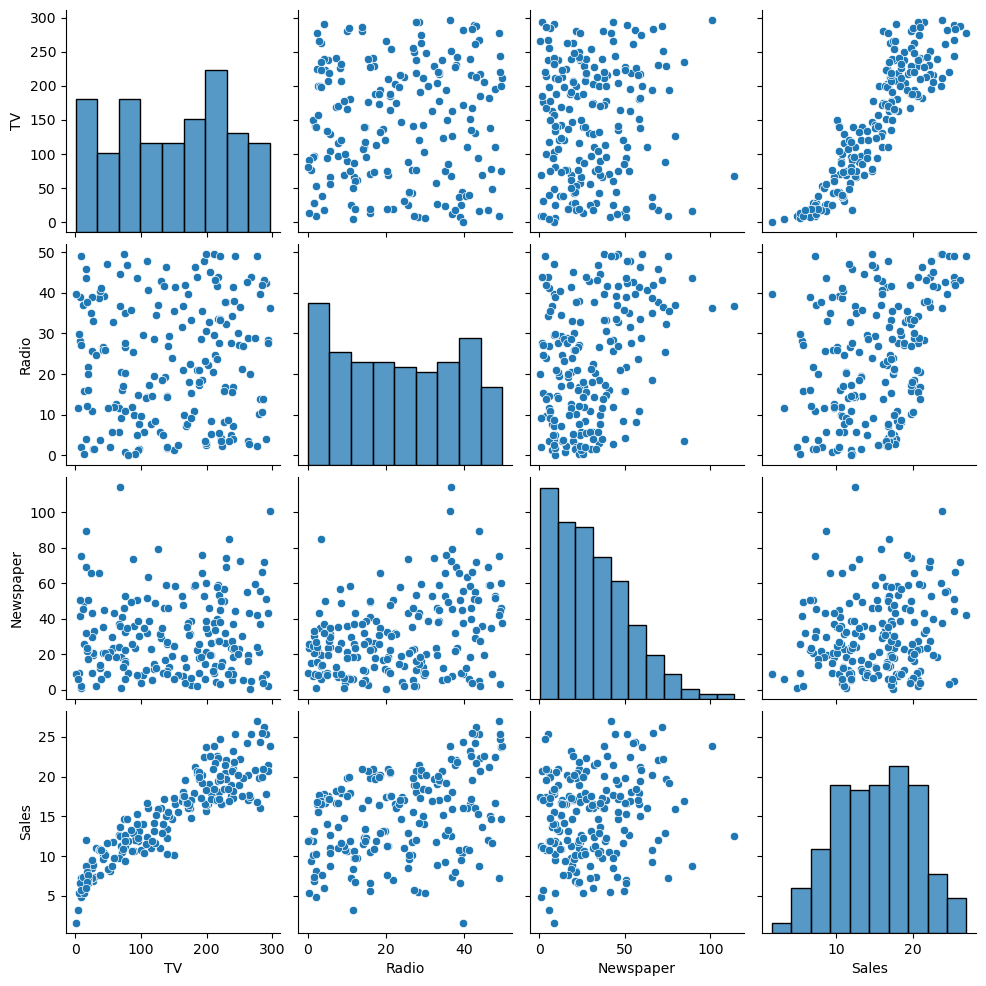

In [12]:
sns.pairplot(df4)
plt.show()

The pairplot shows scatter plots for each pair of features. This helps to visualize the relationships and separability between different features.

In [14]:
# correlation matrix
df4.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<Axes: >

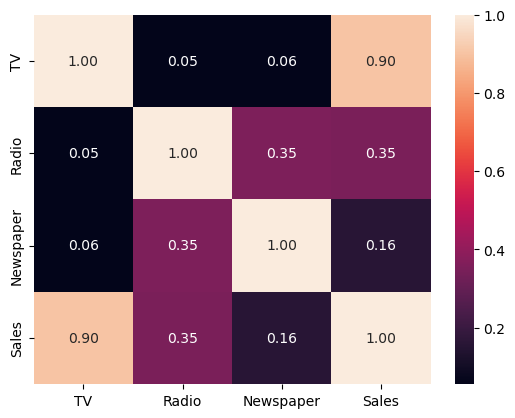

In [29]:
sns.heatmap(df4.corr(), annot=True, fmt=".2f")

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Define features and target variable
X = df4[['TV', 'Radio', 'Newspaper']]
y = df4['Sales']

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [21]:
y_pred = model.predict(X_test)
y_pred

array([17.0347724 , 20.40974033, 23.72398873,  9.27278518, 21.68271879,
       12.56940161, 21.08119452,  8.69035045, 17.23701254, 16.66657475,
        8.92396497,  8.4817344 , 18.2075123 ,  8.06750728, 12.64550975,
       14.93162809,  8.12814594, 17.89876565, 11.00880637, 20.47832788,
       20.80631846, 12.59883297, 10.9051829 , 22.38854775,  9.41796094,
        7.92506736, 20.83908497, 13.81520938, 10.77080925,  7.92682509,
       15.95947357, 10.63490851, 20.80292008, 10.43434164, 21.5784752 ,
       21.18364487, 12.12821771, 22.80953262, 12.60992766,  6.46441252])

In [22]:
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
mse = mean_squared_error(y_test, y_pred)
mse

2.9077569102710923

In [25]:
r2 = r2_score(y_test, y_pred)
r2

0.9059011844150826

Here r2 score is 0.90 which indicates that the regression predictions fit the data approximate 90 percentage accurately.